In [3]:
!pip3 install matplotlib

     |████████████████████████████████| 10.3 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 6.0 MB/s eta 0:00:01


In [4]:
#The Statsmodels tool accesses some deprecated libraries, which results in few warnings while running different code. 
#For the sake of clarity, we can suppress these warnings in our tutorials using the below command:
import warnings; 
warnings.simplefilter('ignore')

In [5]:
%matplotlib inline

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

#### Original source of the dataset

'http://stats191.stanford.edu/data/jobtest.table'

Let us download a dataset that discusses results of tests for employmees. It has the following parameters:

* Test - Score in the aptitude test 
* Minority - relates to the minority status of the applicant; 1 if they belong to some minority category, else 0
* Perf - Score indicating their job performance

In [6]:
jobtest = pd.read_csv('Datasets/jobtest.csv')

jobtest

,TEST,MINORITY,JPERF
0,0.28,1,1.83
1,0.97,1,4.59
2,1.25,1,2.97
3,2.46,1,8.14
4,2.51,1,8.00
5,1.17,1,3.30
6,1.78,1,7.53
7,1.21,1,2.03
8,1.63,1,5.00
9,1.98,1,8.04


In [7]:
factor_group = jobtest.groupby(['MINORITY'])

#### Plotting a scatter plot of the test scores versus the performance, using different markers for minority category

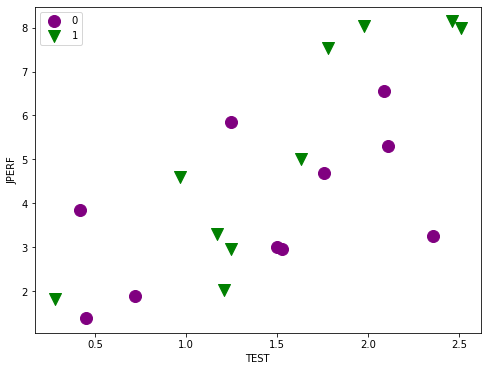

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['purple', 'green']
markers = ['o', 'v']

for factor, group in factor_group:
    ax.scatter(group['TEST'], group['JPERF'], color=colors[factor],
                marker=markers[factor], s=12**2, label=factor)
    
ax.set_xlabel('TEST');
ax.set_ylabel('JPERF');

plt.legend(loc='best') 

## One-way ANOVA

### Model linear relationship between minority status and job performance

In [9]:
model_ols_minority = ols('JPERF ~ C(MINORITY)', data=jobtest).fit()
print(model_ols_minority.summary())

                            OLS Regression Results                            
Dep. Variable:                  JPERF   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.681
Date:                Wed, 26 May 2021   Prob (F-statistic):              0.211
Time:                        20:15:08   Log-Likelihood:                -42.993
No. Observations:                  20   AIC:                             89.99
Df Residuals:                      18   BIC:                             91.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.8740      0.692  

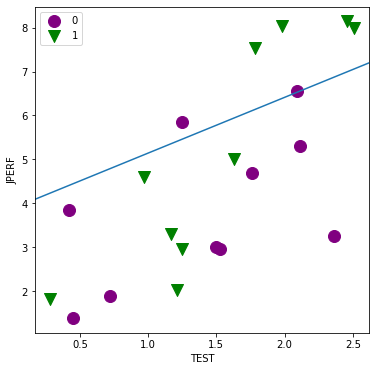

In [10]:
fig, ax = plt.subplots(figsize=(6,6));
for factor, group in factor_group:
    ax.scatter(group['TEST'], group['JPERF'], color=colors[factor],
                marker=markers[factor], s=12**2, label=factor)

ax.set_xlabel('TEST')
ax.set_ylabel('JPERF')

fig = abline_plot(model_results = model_ols_minority, ax=ax)

plt.legend(loc='best')

### Model linear relationship between test scores and job performance

We want to find out what affects the performance of the candidates. This is where we can use the functions of ANOVA from Statsmodels, and that is what we set out to do in this module.

Let us first try to see if the relation between job performance and test scores, without taking the minority aspect into consideration.

In [11]:
model_ols_test = ols('JPERF ~ TEST', data=jobtest).fit()
print(model_ols_test.summary())

                            OLS Regression Results                            
Dep. Variable:                  JPERF   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     19.25
Date:                Wed, 26 May 2021   Prob (F-statistic):           0.000356
Time:                        20:15:08   Log-Likelihood:                -36.614
No. Observations:                  20   AIC:                             77.23
Df Residuals:                      18   BIC:                             79.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0350      0.868      1.192      0.2

Let's plot the same scatter plot as before, but we shall now fit the ols regression line.

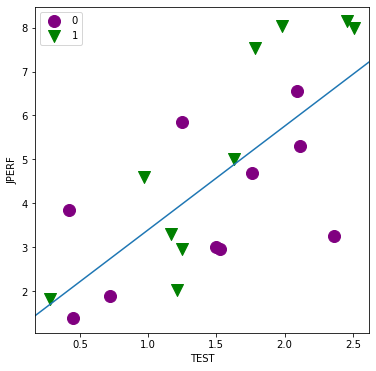

In [12]:
fig, ax = plt.subplots(figsize=(6,6));
for factor, group in factor_group:
    ax.scatter(group['TEST'], group['JPERF'], color=colors[factor],
                marker=markers[factor], s=12**2, label=factor)

ax.set_xlabel('TEST')
ax.set_ylabel('JPERF')

fig = abline_plot(model_results = model_ols_test, ax=ax)


plt.legend(loc='best') 

In [13]:
anova_minority = anova_lm(model_ols_minority)
anova_minority

,df,sum_sq,mean_sq,F,PR(>F)
C(MINORITY),1.0,8.051805,8.051805,1.680582,0.211222
Residual,18.0,86.239450,4.791081,NaN,NaN


In [14]:
anova_test = anova_lm(model_ols_test)
anova_test

,df,sum_sq,mean_sq,F,PR(>F)
TEST,1.0,48.722958,48.722958,19.246127,0.000356
Residual,18.0,45.568297,2.531572,NaN,NaN


## Two-way ANOVA

In [15]:
model_ols_nointeraction = ols('JPERF ~ TEST + MINORITY', data = jobtest).fit()
print(model_ols_nointeraction.summary())

                            OLS Regression Results                            
Dep. Variable:                  JPERF   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     11.38
Date:                Wed, 26 May 2021   Prob (F-statistic):           0.000731
Time:                        20:15:10   Log-Likelihood:                -35.390
No. Observations:                  20   AIC:                             76.78
Df Residuals:                      17   BIC:                             79.77
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6120      0.887      0.690      0.5

In [16]:
model_ols_interaction = ols('JPERF ~ TEST + MINORITY + TEST:MINORITY', data = jobtest).fit()
print(model_ols_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  JPERF   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     10.55
Date:                Wed, 26 May 2021   Prob (F-statistic):           0.000451
Time:                        20:15:11   Log-Likelihood:                -32.971
No. Observations:                  20   AIC:                             73.94
Df Residuals:                      16   BIC:                             77.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.0103      1.050      1.914

#### The two-way ANOVA null hypothesis is accepted

* The F-statistic for TEST is significant
* The F-statistic for MINORITY is not significant
* The F-statistic for TEST:MINORITY is significant

In [17]:
anova_lm(model_ols_nointeraction)

,df,sum_sq,mean_sq,F,PR(>F)
TEST,1.0,48.722958,48.722958,20.542126,0.000295
MINORITY,1.0,5.246751,5.246751,2.212087,0.155246
Residual,17.0,40.321546,2.371856,NaN,NaN


In [18]:
anova_lm(model_ols_interaction)

,df,sum_sq,mean_sq,F,PR(>F)
TEST,1.0,48.722958,48.722958,24.626621,0.000141
MINORITY,1.0,5.246751,5.246751,2.651927,0.122952
TEST:MINORITY,1.0,8.666073,8.666073,4.380196,0.052650
Residual,16.0,31.655473,1.978467,NaN,NaN


### Comparing regression models

* Pass in more than one regression model to the anova_lm function
* See if the sum of the squares of the residuals is significant, if yes the one with the lower sum of squares of residuals can be thought of as the better model

In [19]:
model_ols_test_interaction = ols('JPERF ~ TEST + TEST:MINORITY', data=jobtest).fit()
print(model_ols_test_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                  JPERF   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     14.59
Date:                Wed, 26 May 2021   Prob (F-statistic):           0.000204
Time:                        20:15:13   Log-Likelihood:                -33.891
No. Observations:                  20   AIC:                             73.78
Df Residuals:                      17   BIC:                             76.77
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1211      0.780      1.437

In [20]:
anova_lm(model_ols_test, model_ols_nointeraction)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,18.0,45.568297,0.0,NaN,NaN,NaN
1,17.0,40.321546,1.0,5.246751,2.212087,0.155246


In [21]:
anova_lm(model_ols_test, model_ols_test_interaction)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,18.0,45.568297,0.0,NaN,NaN,NaN
1,17.0,34.707653,1.0,10.860644,5.319603,0.033949


In [22]:
anova_lm(model_ols_test, model_ols_interaction)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,18.0,45.568297,0.0,NaN,NaN,NaN
1,16.0,31.655473,2.0,13.912824,3.516061,0.054236
